In [52]:
from pathlib import Path
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms

In [42]:
cards_dataset_path = Path(r"E:\twibot\twinit-dataset\cards")
random.seed(123)

In [43]:
plt.rcParams['figure.figsize'] = [12, 5]

## Cards selection

In [44]:
cards_indexes = random.sample(list(range(1, 121)), 10)
image_pathes = []
images = []
for ci in cards_indexes:
    cards_path = cards_dataset_path / str(ci)
    image_pathes.append(random.choice(list(cards_path.glob("*.jpg"))))
    images.append(cv2.imread(str(image_pathes[-1])))

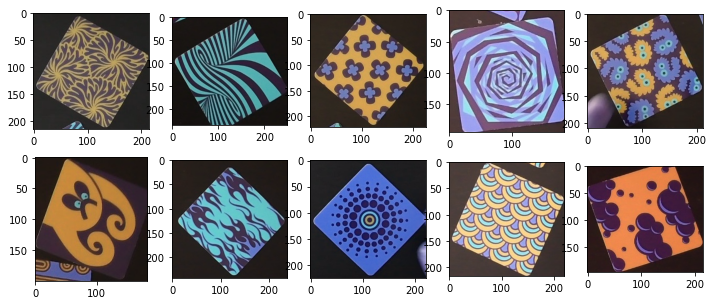

In [45]:
fig, axes = plt.subplots(2, 5)
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(images[i])
plt.show()

In [180]:
images_resized = [cv2.resize(img, (128, 128)) for img in images]
images_resized = np.array(images_resized)
images_resized = np.transpose(images_resized, (0, 3, 1, 2))
images_tensor = torch.Tensor(images_resized) / 255

## Train transforms

In [ ]:
train_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=[0.25, 1.75], contrast=[0.75, 2], saturation=[0.5, 1.5]),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomRotation(20, fill=0.2)
])

In [ ]:
images_transformed_tensor = train_transforms(images_tensor)

In [ ]:
images_transformed = images_transformed_tensor.numpy()
images_transformed *= 255
images_transformed = np.clip(images_transformed, 0, 255)
images_transformed = images_transformed.astype(int)
images_transformed = np.transpose(images_transformed, (0, 2, 3, 1))

In [ ]:
fig, axes = plt.subplots(2, 5)
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(images_transformed[i, :])
plt.show()

## Validation transofrmations

In [204]:
valid_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5)
])

In [205]:
images_transformed_tensor = valid_transforms(images_tensor)

In [206]:
images_transformed = images_transformed_tensor.numpy()
images_transformed *= 255
images_transformed = np.clip(images_transformed, 0, 255)
images_transformed = images_transformed.astype(int)
images_transformed = np.transpose(images_transformed, (0, 2, 3, 1))

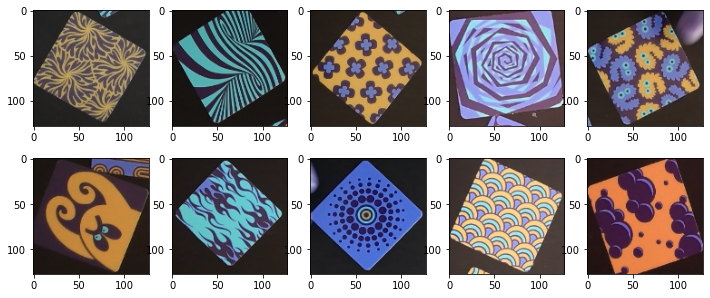

In [207]:
fig, axes = plt.subplots(2, 5)
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(images_transformed[i, :])
plt.show()

In [ ]:
def denormalize(arr):
    arr[:, 0, ...] = arr[:, 0, ...] * 0.225 + 0.406
    arr[:, 1, ...] = arr[:, 1, ...] * 0.224 + 0.456
    arr[:, 2, ...] = arr[:, 2, ...] * 0.229 + 0.485
    return arr

In [211]:
from datetime import datetime

In [221]:
datetime.now().strftime("%Y%m%d-%H%m%S")

'20221225-181231'